# Machine Learning Project 1

Building a machine learning model that can predict an outcome based on a set of features. This task will involve: data preparation, model training, and model evaluation.

# Adeyemo Gabriel. A.

# October, 2024.


# LIBRARIES AND DATA IMPORTATION

The first step in this project is to clean and preprocess the data. In real-world datasets, missing values, noise, and inconsistencies are common challenges. Handling missing values may involve removing rows with missing data, or imputing values using techniques such as mean or median imputation. Outliers, which may skew the data distribution, need to be either removed or scaled. In this session we will cover;

- Importing Libraries
- Reading/Loading data from a CSV file
- Data cleaning and Visualisation
- Viewing data on distribution plot and pair plot
* Creating model to predict


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('welldata.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25225.0,12612.000000,7281.974606,0.000000,6306.000000,12612.000000,18918.000000,25224.000000
DTP_1,22247.0,78.755918,12.351177,47.622173,69.971130,78.009560,87.157005,129.992800
DTS_1,7110.0,139.543892,18.765181,99.878790,123.984243,140.274580,153.554225,194.284620
GR_1,17405.0,89.017662,31.976397,0.305100,68.146370,82.042340,101.049650,343.692080
MD_1,25200.0,1598.342599,952.192301,0.200000,787.375000,1574.760250,2362.154925,3799.680000
NPHI_1,10317.0,0.167380,0.078063,-0.030371,0.111129,0.163653,0.207136,0.517698
RT_1,23245.0,61.611110,302.924417,-999.990100,4.938200,9.732183,18.584400,2437.807900
RHOB_1,10631.0,2.476870,0.125215,1.697240,2.389408,2.489045,2.579605,3.032781


In [4]:
df.head()

,Unnamed: 0,DTP_1,DTS_1,GR_1,MD_1,NPHI_1,RT_1,RHOB_1
0,0,NaN,NaN,NaN,0.2,NaN,NaN,NaN
1,1,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,3,NaN,NaN,NaN,1.5,NaN,NaN,NaN
4,4,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [5]:
df.tail()

,Unnamed: 0,DTP_1,DTS_1,GR_1,MD_1,NPHI_1,RT_1,RHOB_1
25220,25220,NaN,NaN,NaN,NaN,NaN,-999.99005,NaN
25221,25221,NaN,NaN,NaN,NaN,NaN,-999.99010,NaN
25222,25222,NaN,NaN,NaN,NaN,NaN,-999.99010,NaN
25223,25223,NaN,NaN,NaN,NaN,NaN,-999.99005,NaN
25224,25224,NaN,NaN,NaN,NaN,NaN,-999.99005,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25225 entries, 0 to 25224
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25225 non-null  int64  
 1   DTP_1       22247 non-null  float64
 2   DTS_1       7110 non-null   float64
 3   GR_1        17405 non-null  float64
 4   MD_1        25200 non-null  float64
 5   NPHI_1      10317 non-null  float64
 6   RT_1        23245 non-null  float64
 7   RHOB_1      10631 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.5 MB


## DATA CLEANING AND VISUALISATION

if column `MD_1` is assumed to be measured depth then column `Unnamed` will be rendered useless, therefore it has to be dropped 

In [7]:
df = df.drop(df.columns[0], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25225 entries, 0 to 25224
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DTP_1   22247 non-null  float64
 1   DTS_1   7110 non-null   float64
 2   GR_1    17405 non-null  float64
 3   MD_1    25200 non-null  float64
 4   NPHI_1  10317 non-null  float64
 5   RT_1    23245 non-null  float64
 6   RHOB_1  10631 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DTP_1,22247.0,78.755918,12.351177,47.622173,69.971130,78.009560,87.157005,129.992800
DTS_1,7110.0,139.543892,18.765181,99.878790,123.984243,140.274580,153.554225,194.284620
GR_1,17405.0,89.017662,31.976397,0.305100,68.146370,82.042340,101.049650,343.692080
MD_1,25200.0,1598.342599,952.192301,0.200000,787.375000,1574.760250,2362.154925,3799.680000
NPHI_1,10317.0,0.167380,0.078063,-0.030371,0.111129,0.163653,0.207136,0.517698
RT_1,23245.0,61.611110,302.924417,-999.990100,4.938200,9.732183,18.584400,2437.807900
RHOB_1,10631.0,2.476870,0.125215,1.697240,2.389408,2.489045,2.579605,3.032781


 The ﬁrst step in data cleaning is data visualization. 

In [10]:
df.columns

Index(['DTP_1', 'DTS_1', 'GR_1', 'MD_1', 'NPHI_1', 'RT_1', 'RHOB_1'], dtype='object')

In [11]:
# Choosing specific logs to plot
data = df[["DTP_1" , "DTS_1" ,"GR_1" , "MD_1" , "NPHI_1" , "RT_1" , "RHOB_1" ]]

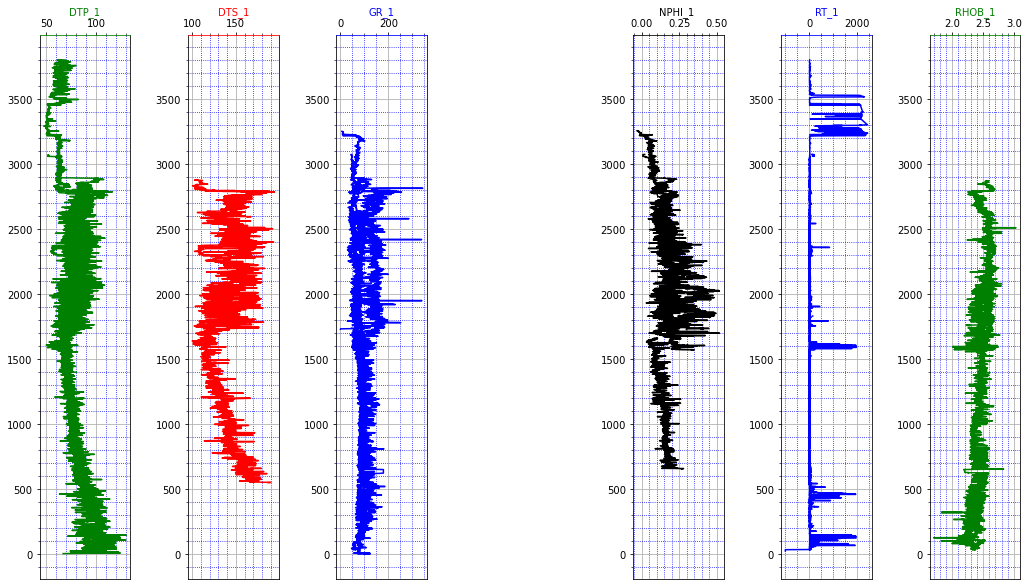

In [12]:
fig , ax = plt.subplots(figsize=(22,10)) 

# plots parameters
ax1 = plt.subplot2grid((1,25),(0,0),colspan=2)
ax2 = plt.subplot2grid((1,25),(0,3),colspan=2, sharey = ax1)
ax3 = plt.subplot2grid((1,25),(0,6),colspan=2, sharey = ax1)
ax4 = plt.subplot2grid((1,25),(0,12),colspan=2, sharey = ax1)
ax5 = plt.subplot2grid((1,25),(0,15),colspan=2, sharey = ax1)
ax6 = plt.subplot2grid((1,25),(0,18),colspan=2, sharey = ax1)

# general parameters
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.grid(which="major")
    ax.grid(which="minor" , linestyle = "dotted" , color = "blue")
    ax.minorticks_on()
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

# DTP_1 track
ax1.plot(data["DTP_1"] , data["MD_1"] , color = "green")
ax1.set_xlabel("DTP_1")
ax1.xaxis.label.set_color("green")
ax1.spines["top"]
ax1.spines["top"].set_edgecolor("green")
ax1.spines["top"].set_position(("axes" , 1))

# DTS_1 track
ax2.plot(data["DTS_1"] , data["MD_1"] , color = "red")
ax2.set_xlabel("DTS_1")
ax2.xaxis.label.set_color("red")
ax2.spines["top"]
ax2.spines["top"].set_edgecolor("red")
ax2.spines["top"].set_position(("axes" , 1))

# GR_1 track
ax3.plot(data["GR_1"] , data["MD_1"] , color = "blue")
ax3.set_xlabel("GR_1")
ax3.xaxis.label.set_color("blue")
ax3.spines["top"]
ax3.spines["top"].set_edgecolor("blue")
ax3.spines["top"].set_position(("axes" , 1))

# NPHI_1 track
ax4.plot(data["NPHI_1"] , data["MD_1"] , color = "black")
ax4.set_xlabel("NPHI_1 ")
ax4.xaxis.label.set_color("black")
ax4.spines["top"]
ax4.spines["top"].set_edgecolor("black")
ax4.spines["top"].set_position(("axes" , 1))

# RT_1 curve
ax5.plot(data["RT_1"] , data["MD_1"] , color = "blue")
ax5.set_xlabel("RT_1")
ax5.xaxis.label.set_color("blue")
ax5.spines["top"]
ax5.spines["top"].set_edgecolor("blue")
ax5.spines["top"].set_position(("axes" , 1))

 # RHOB_1 track
ax6.plot(data["RHOB_1"] , data["MD_1"] , color = "green")
ax6.set_xlabel("RHOB_1")
ax6.xaxis.label.set_color("green")
ax6.spines["top"]
ax6.spines["top"].set_edgecolor("green")
ax6.spines["top"].set_position(("axes" , 1))

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,DTP_1,DTS_1,GR_1,MD_1,NPHI_1,RT_1,RHOB_1
3216,62.136375,103.84200,124.418640,1607.9714,0.129799,587.60187,2.454789
3217,58.123062,103.84005,93.753400,1608.5188,0.093310,1458.09510,2.393845
3218,59.650417,103.98437,84.290550,1609.0269,0.074229,1756.11820,2.375702
3219,62.246384,104.75465,106.010025,1609.4774,0.095398,1450.80750,2.417671
3220,62.597550,106.55261,103.664490,1610.0365,0.091300,913.78500,2.501550


In [15]:
df.tail()

,DTP_1,DTS_1,GR_1,MD_1,NPHI_1,RT_1,RHOB_1
5640,65.886590,110.566200,100.058685,2820.0066,0.090205,13.747142,2.551933
5641,65.267760,109.113365,101.116714,2820.4766,0.089203,14.360171,2.551840
5642,64.322580,107.021860,103.519210,2821.0000,0.088637,15.857600,2.561656
5643,63.334820,104.816360,104.608840,2821.5240,0.090211,20.203428,2.579122
5644,62.390858,104.168800,106.188010,2821.9934,0.092704,20.621456,2.585591


In [16]:
# Choosing specific logs to plot
data = df[["DTP_1" , "DTS_1" ,"GR_1" , "MD_1" , "NPHI_1" , "RT_1" , "RHOB_1" ]]

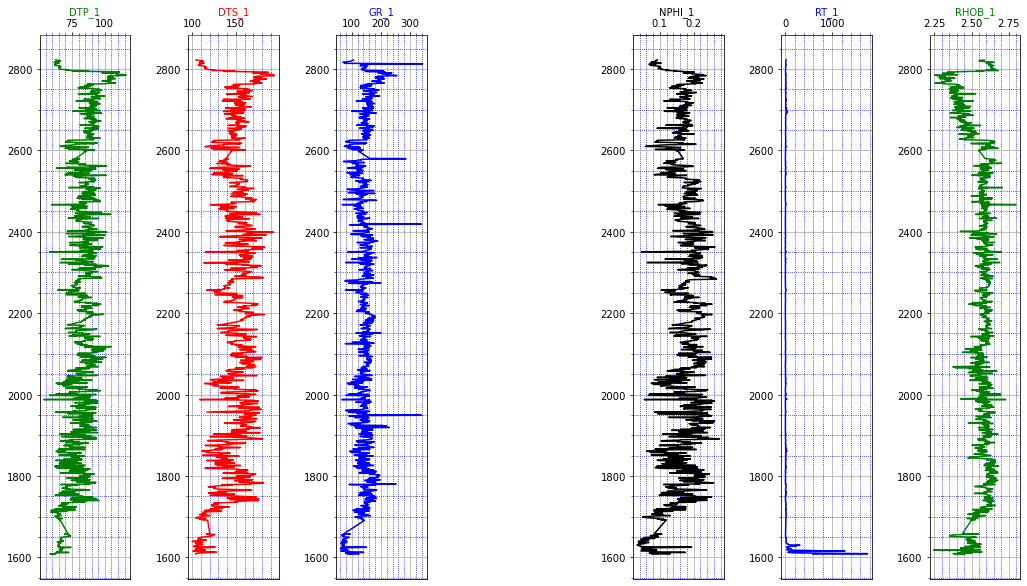

In [17]:
fig , ax = plt.subplots(figsize=(22,10)) 

# plots parameters
ax1 = plt.subplot2grid((1,25),(0,0),colspan=2)
ax2 = plt.subplot2grid((1,25),(0,3),colspan=2, sharey = ax1)
ax3 = plt.subplot2grid((1,25),(0,6),colspan=2, sharey = ax1)
ax4 = plt.subplot2grid((1,25),(0,12),colspan=2, sharey = ax1)
ax5 = plt.subplot2grid((1,25),(0,15),colspan=2, sharey = ax1)
ax6 = plt.subplot2grid((1,25),(0,18),colspan=2, sharey = ax1)

# general parameters
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.grid(which="major")
    ax.grid(which="minor" , linestyle = "dotted" , color = "blue")
    ax.minorticks_on()
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

# DTP_1 track
ax1.plot(data["DTP_1"] , data["MD_1"] , color = "green")
ax1.set_xlabel("DTP_1")
ax1.xaxis.label.set_color("green")
ax1.spines["top"]
ax1.spines["top"].set_edgecolor("green")
ax1.spines["top"].set_position(("axes" , 1))

# DTS_1 track
ax2.plot(data["DTS_1"] , data["MD_1"] , color = "red")
ax2.set_xlabel("DTS_1")
ax2.xaxis.label.set_color("red")
ax2.spines["top"]
ax2.spines["top"].set_edgecolor("red")
ax2.spines["top"].set_position(("axes" , 1))

# GR_1 track
ax3.plot(data["GR_1"] , data["MD_1"] , color = "blue")
ax3.set_xlabel("GR_1")
ax3.xaxis.label.set_color("blue")
ax3.spines["top"]
ax3.spines["top"].set_edgecolor("blue")
ax3.spines["top"].set_position(("axes" , 1))

# NPHI_1 track
ax4.plot(data["NPHI_1"] , data["MD_1"] , color = "black")
ax4.set_xlabel("NPHI_1 ")
ax4.xaxis.label.set_color("black")
ax4.spines["top"]
ax4.spines["top"].set_edgecolor("black")
ax4.spines["top"].set_position(("axes" , 1))

# RT_1 curve
ax5.plot(data["RT_1"] , data["MD_1"] , color = "blue")
ax5.set_xlabel("RT_1")
ax5.xaxis.label.set_color("blue")
ax5.spines["top"]
ax5.spines["top"].set_edgecolor("blue")
ax5.spines["top"].set_position(("axes" , 1))

 # RHOB_1 track
ax6.plot(data["RHOB_1"] , data["MD_1"] , color = "green")
ax6.set_xlabel("RHOB_1")
ax6.xaxis.label.set_color("green")
ax6.spines["top"]
ax6.spines["top"].set_edgecolor("green")
ax6.spines["top"].set_position(("axes" , 1))

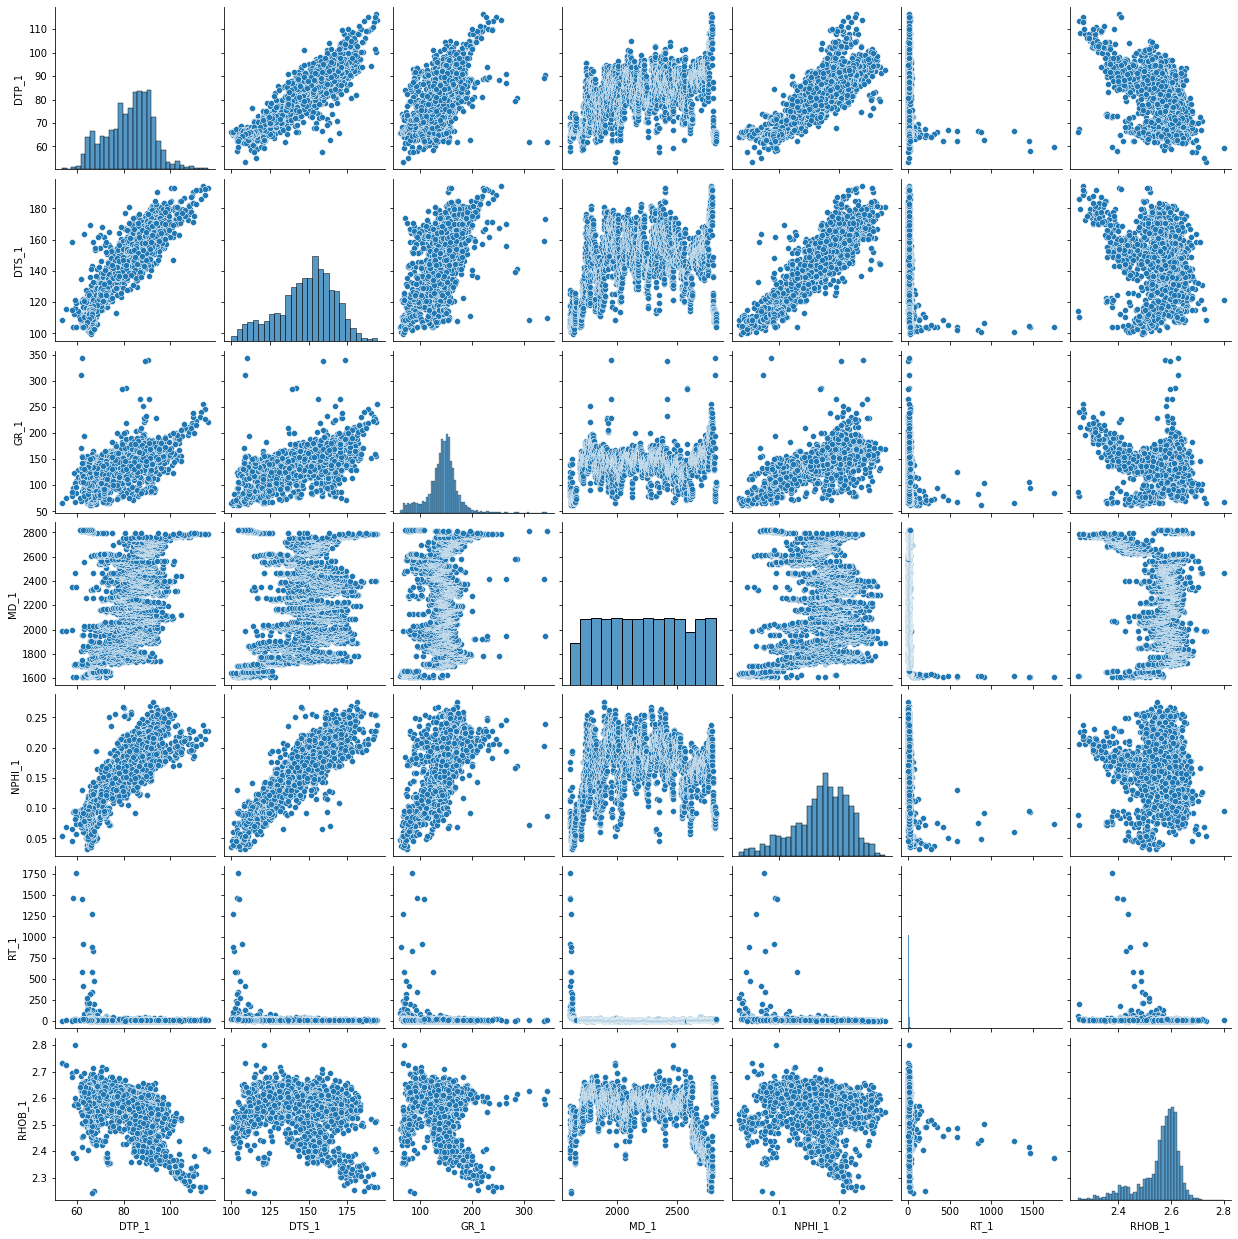

In [18]:
# pair plots of each feature

sns.pairplot(df)

<AxesSubplot:>

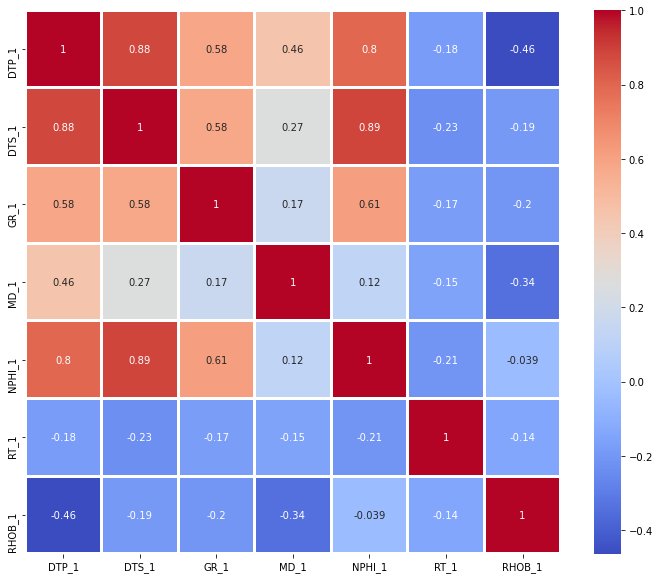

In [19]:
# heatmap of pearson correlation

plt.ﬁgure(ﬁgsize=(12,10)) 
sns.heatmap(df.corr(), annot=True, linecolor='white', linewidths=2, cmap='coolwarm') 

the highest absolute value of Pearson correlation coefﬁcient of the parameters could be potentially be dropped as long as the overall testing accuracy of the model does not decrease. In this case the parameters were left to be included in the model. this is because we are using Tree-based algorithms such as decision tree, random forest, etc., which do not require feature normalization or standardization. For example, when applying decision tree, since a tree is being branched down, normalization or standardization will not help

## CREATING A MODEL OF RHOB_1 USING DECISION TREE AND RANDOM FOREST 

In [20]:
# Let’s deﬁne the x and y variables as follows: 

x=df.drop(['RHOB_1'], axis=1) 
y=df['RHOB_1'] 

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [22]:
seed = 1000
np.random.seed(seed) 
X_train,X_test,y_train, y_test=train_test_split(x, y, test_size=0.30)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
np.random.seed(seed) 
dtree = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=4, min_samples_leaf=2, max_features=None,ccp_alpha=0)

In [25]:
dtree.ﬁt(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0, min_samples_leaf=2, min_samples_split=4)

In [26]:
# Now that the model has been ﬁt to training inputs and output, let’s apply to predict "X_train" and "X_test" as follows
y_pred_train=dtree.predict(X_train) 
y_pred_test=dtree.predict(X_test) 

# Next, let’s obtain the training and testing R2 as follows, R2 means coefficent of determination which is the square of the corellation coefficeint 


In [27]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1] 
print('Training Data Rˆ2¼',round(corr_train**2,4),'R=', round(corr_train,4)) 

Training Data Rˆ2¼ 0.9846 R= 0.9923


In [28]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1] 
print('Testing Data Rˆ2=',round(corr_test**2,4),'R=', round(corr_test,4)) 

Testing Data Rˆ2= 0.7998 R= 0.8943


As illustrated, the training R2 is 98.5%. However, the testing R2 is only 79.9%.

##  Next, let’s visualize the training actual versus prediction and testing actual versus prediction as follows:

Text(0.5, 1.0, 'RHOB_1 Training Actual Vs. Prediction')

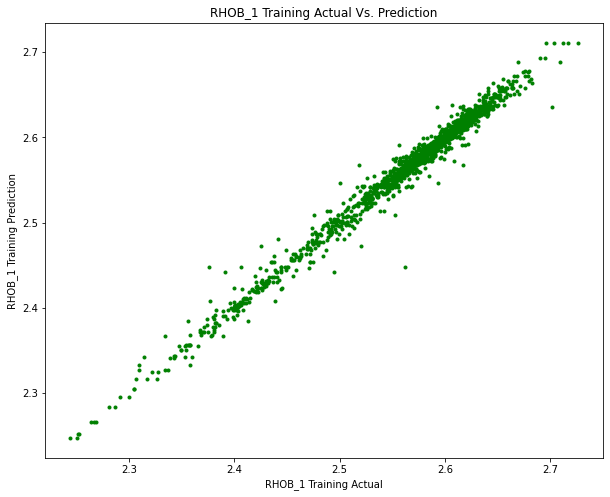

In [29]:
plt.ﬁgure(ﬁgsize=(10,8)) 
plt.plot(y_train, y_pred_train, 'g.') 
plt.xlabel('RHOB_1 Training Actual') 
plt.ylabel('RHOB_1 Training Prediction') 
plt.title('RHOB_1 Training Actual Vs. Prediction') 

Text(0.5, 1.0, 'RHOB_1 Testing Actual Vs. Prediction')

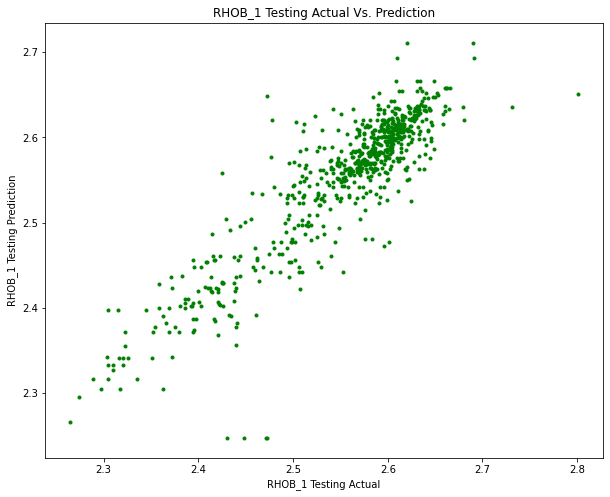

In [30]:
plt.ﬁgure(ﬁgsize=(10,8)) 
plt.plot(y_test, y_pred_test, 'g.') 
plt.xlabel('RHOB_1 Testing Actual') 
plt.ylabel('RHOB_1 Testing Prediction') 
plt.title('RHOB_1 Testing Actual Vs. Prediction') 

## Next, let’s also obtain MAE, MSE, and RMSE for the testing set as follows:


In [31]:
from sklearn import metrics 
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5)) 
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5)) 
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5)) 

MAE: 0.02516
MSE: 0.00143
RMSE: 0.03783


Decision tree also allows feature ranking by calling dtree.feature_importances_" as follows:

In [32]:
dtree.feature_importances_ 

array([0.08640298, 0.05520119, 0.02956333, 0.76502353, 0.02254362,
       0.04126536])

In [33]:
feature_names=df.columns[:-1] 
plt.ﬁgure(ﬁgsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

#Let’s place this in a visualization format using a tornado chart as follows:

Text(0.5, 1.0, 'Feature Importance Ranking')

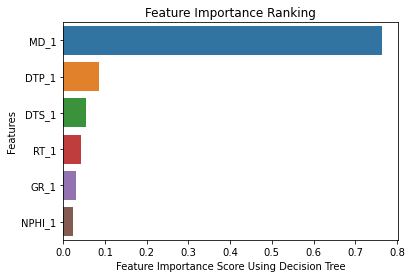

In [34]:
feature_imp=pd.Series(dtree.feature_importances_, index=feature_names).sort_values(ascending=False) 
sns.barplot(x=feature_imp, y=feature_imp.index) 
plt.xlabel('Feature Importance Score Using Decision Tree') 
plt.ylabel('Features') 
plt.title("Feature Importance Ranking") 

Let's do a crossvalidation to observe the resulting average R2 as follows:

In [35]:
from sklearn.model_selection import cross_val_score 
np.random.seed(seed) 
scores_R2=cross_val_score(dtree, x, y,cv=5,scoring='r2') 
print(" R2_Cross-validation scores: {}". format(scores_R2)) 

 R2_Cross-validation scores: [ 0.1000924  -0.10787357 -0.70398015 -0.26400982 -0.52961942]


In [36]:
print(" Average R2_Cross-validation scores: {}". format(scores_R2.mean()))

 Average R2_Cross-validation scores: -0.3010781112116468


In [50]:
model = np.corrcoef(y_test, y_pred_test) [0,1] 

In [51]:
model.save("prediction_model_RHOB_1.h5"

AttributeError: 'numpy.float64' object has no attribute 'save'

## Creating a model to predict RHOB_1 using Random forest..

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [38]:
seed = 1000
np.random.seed(seed) 
X_train,X_test,y_train, y_test=train_test_split(x, y, test_size=0.30)

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
np.random.seed(seed) 
rf= RandomForestRegressor(n_estimators=5000, criterion='mse',max_depth=None, min_samples_split=4, min_samples_leaf=2, max_features=None, n_jobs=-1)

Next, let’s apply these deﬁned "rf" parameters to the training inputs and output features (X_train,y_train) and obtain the accuracy of both training and testing sets as shown below:


In [41]:
rf.ﬁt(X_train,y_train) 
y_pred_train=rf.predict(X_train) 
y_pred_test=rf.predict(X_test) 
corr_train=np.corrcoef(y_train, y_pred_train) [0,1] 
print('Training Data Rˆ2=',round(corr_train**2,4),'R=', round(corr_train,4)) 

Training Data Rˆ2= 0.9724 R= 0.9861


In [42]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1] 
print('Testing Data Rˆ2=',round(corr_test**2,4),'R=', round(corr_test,4)) 

Testing Data Rˆ2= 0.898 R= 0.9477


As can be observed, the testing R2 is 89.8% compared to 79.9% of the decision tree. Therefore, without doing further parameter ﬁne-tuning, the random forest algorithm appears to be outperforming the decision tree. 

## Let’s also visualize the cross plots of actual versus predicted training and testing data sets as follows: 

Text(0.5, 1.0, 'RHOB_1 Training Actual Vs. Prediction')

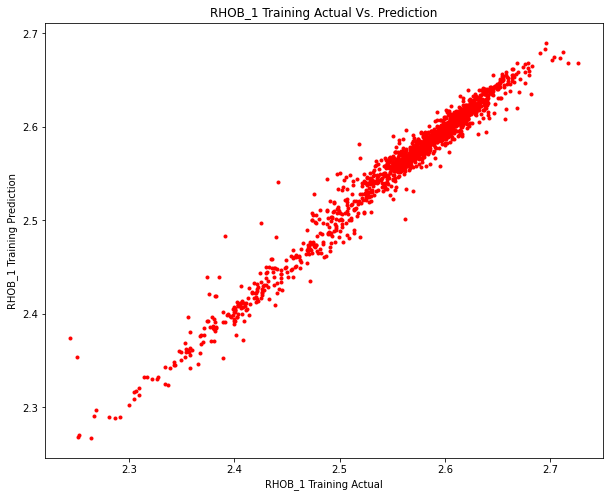

In [43]:
plt.ﬁgure(ﬁgsize=(10,8)) 
plt.plot(y_train, y_pred_train, 'r.') 
plt.xlabel('RHOB_1 Training Actual') 
plt.ylabel('RHOB_1 Training Prediction') 
plt.title('RHOB_1 Training Actual Vs. Prediction')

Text(0.5, 1.0, 'RHOB_1 Testing Actual Vs. Prediction')

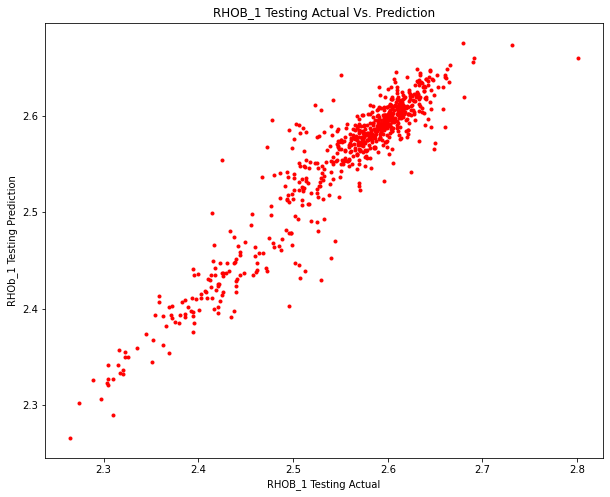

In [44]:
plt.ﬁgure(ﬁgsize=(10,8)) 
plt.plot(y_test, y_pred_test, 'r.') 
plt.xlabel('RHOB_1 Testing Actual') 
plt.ylabel('RHOb_1 Testing Prediction') 
plt.title('RHOB_1 Testing Actual Vs. Prediction')

## Next, let’s also obtain MAE, MSE, and RMSE for the testing set as follows:


In [45]:
from sklearn import metrics 
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5)) 
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5)) 
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.01809
MSE: 0.00069
RMSE: 0.02632


As illustrated, MAE, MSE, and RMSE values are lower as compared to the decision tree model. Next, let’s also obtain the feature ranking using random forest as follows;

Text(0.5, 1.0, 'Feature Importance Ranking')

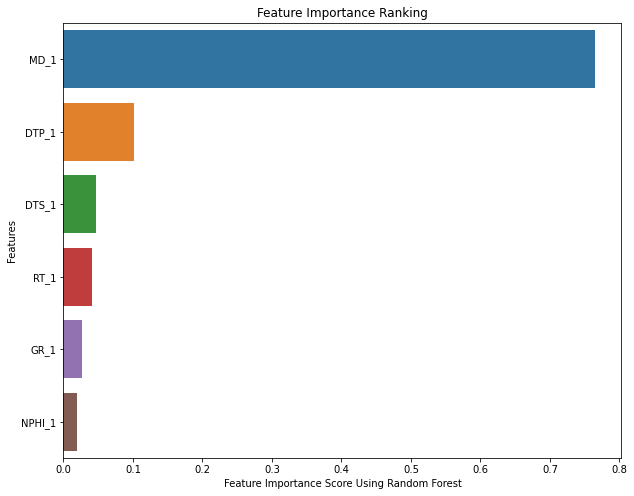

In [46]:
feature_names=df.columns[:-1] 
plt.ﬁgure(ﬁgsize=(10,8)) 
feature_imp=pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False) 
sns.barplot(x=feature_imp, y=feature_imp.index) 
plt.xlabel('Feature Importance Score Using Random Forest') 
plt.ylabel('Features') 
plt.title("Feature Importance Ranking")

The important features obtained by random forest is different than what was obtained from decision tree. This is primarily attributed to the higher accuracy of the random forest model. The recommendation is to go with the model with higher accuracy which is the random forest model in this particular example.

To be consistent with the decision tree model, let’s also do a ﬁve-fold cross-validation to observe the resulting average R2 for the random forest model as follows:

In [47]:
from sklearn.model_selection import cross_val_score 
np.random.seed(seed) 
scores_R2=cross_val_score(rf, x, y,cv=5,scoring='r2') 
print(" R2_Cross-validation scores: {}". format(scores_R2)) 

 R2_Cross-validation scores: [ 0.05888292  0.28849619  0.1125756   0.33471739 -0.50035774]


In [48]:
print(" Average R2_Cross-validation scores: {}". format(scores_R2.mean())) 

 Average R2_Cross-validation scores: 0.05886287095450413


## THANKS 